In [3]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
df = pd.read_csv(url, names=column_names)

# Display the first 5 rows
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
# Check the shape of the dataset
print("Shape of the dataset:", df.shape)  # Should return (768, 9)

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Get basic statistics
print("Summary statistics:\n", df.describe())

# Check the distribution of the target variable
print("Distribution of Outcome:\n", df["Outcome"].value_counts())

Shape of the dataset: (768, 9)
Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Summary statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.0

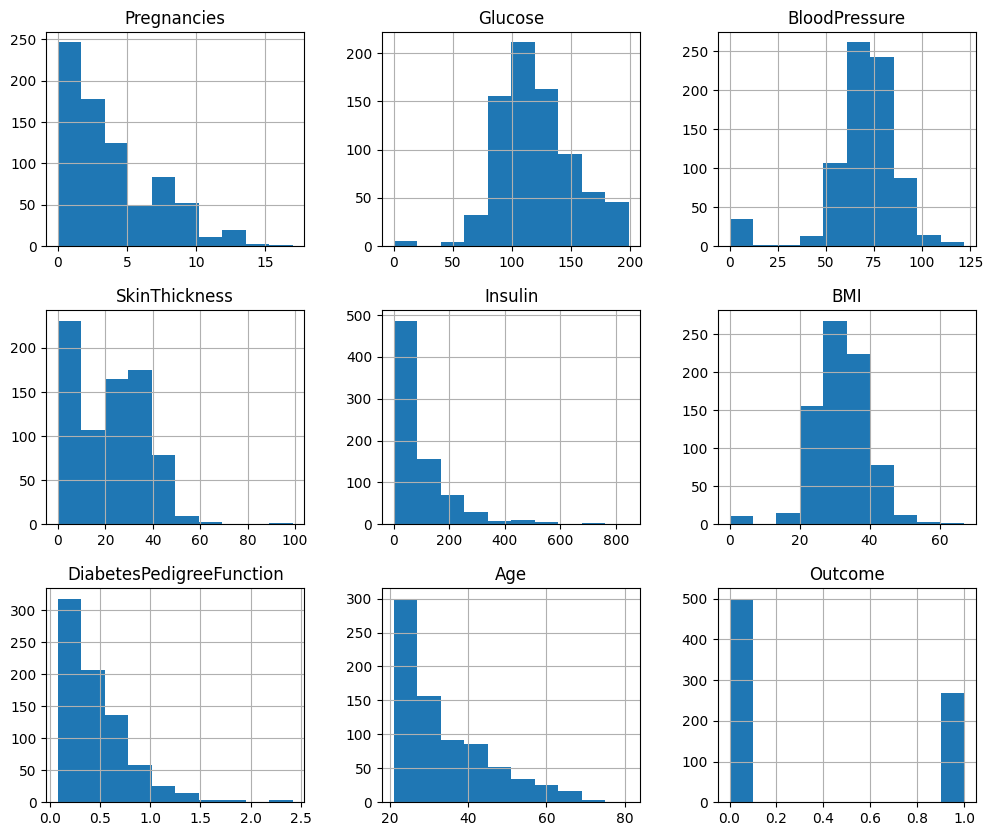

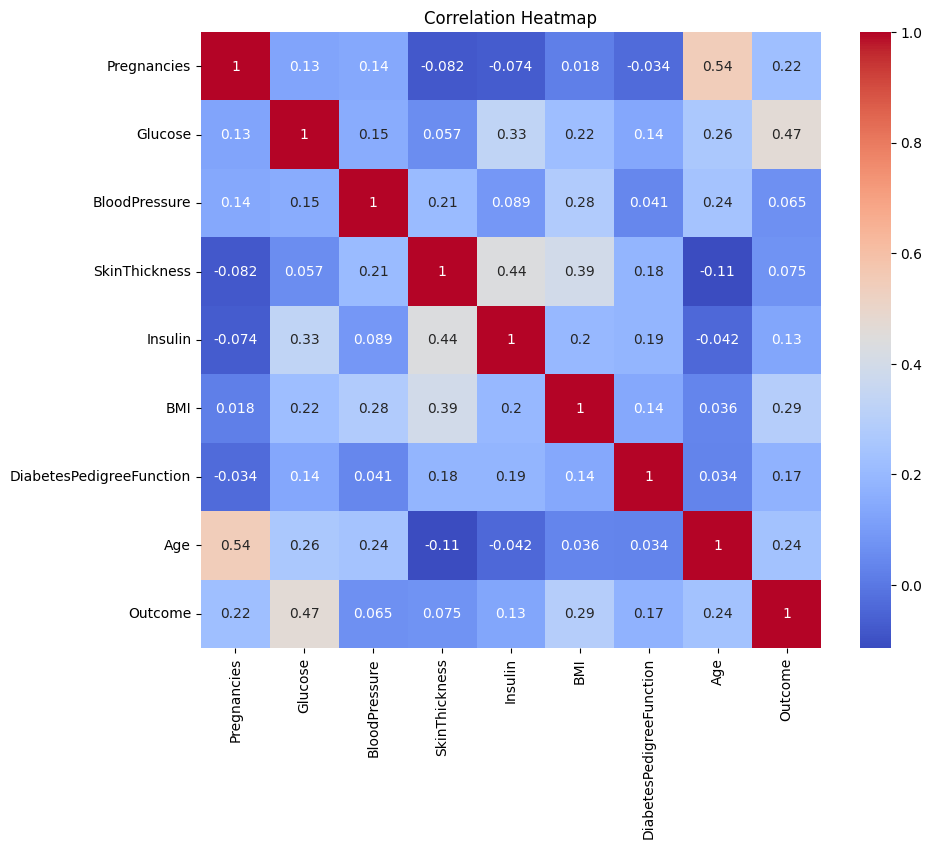

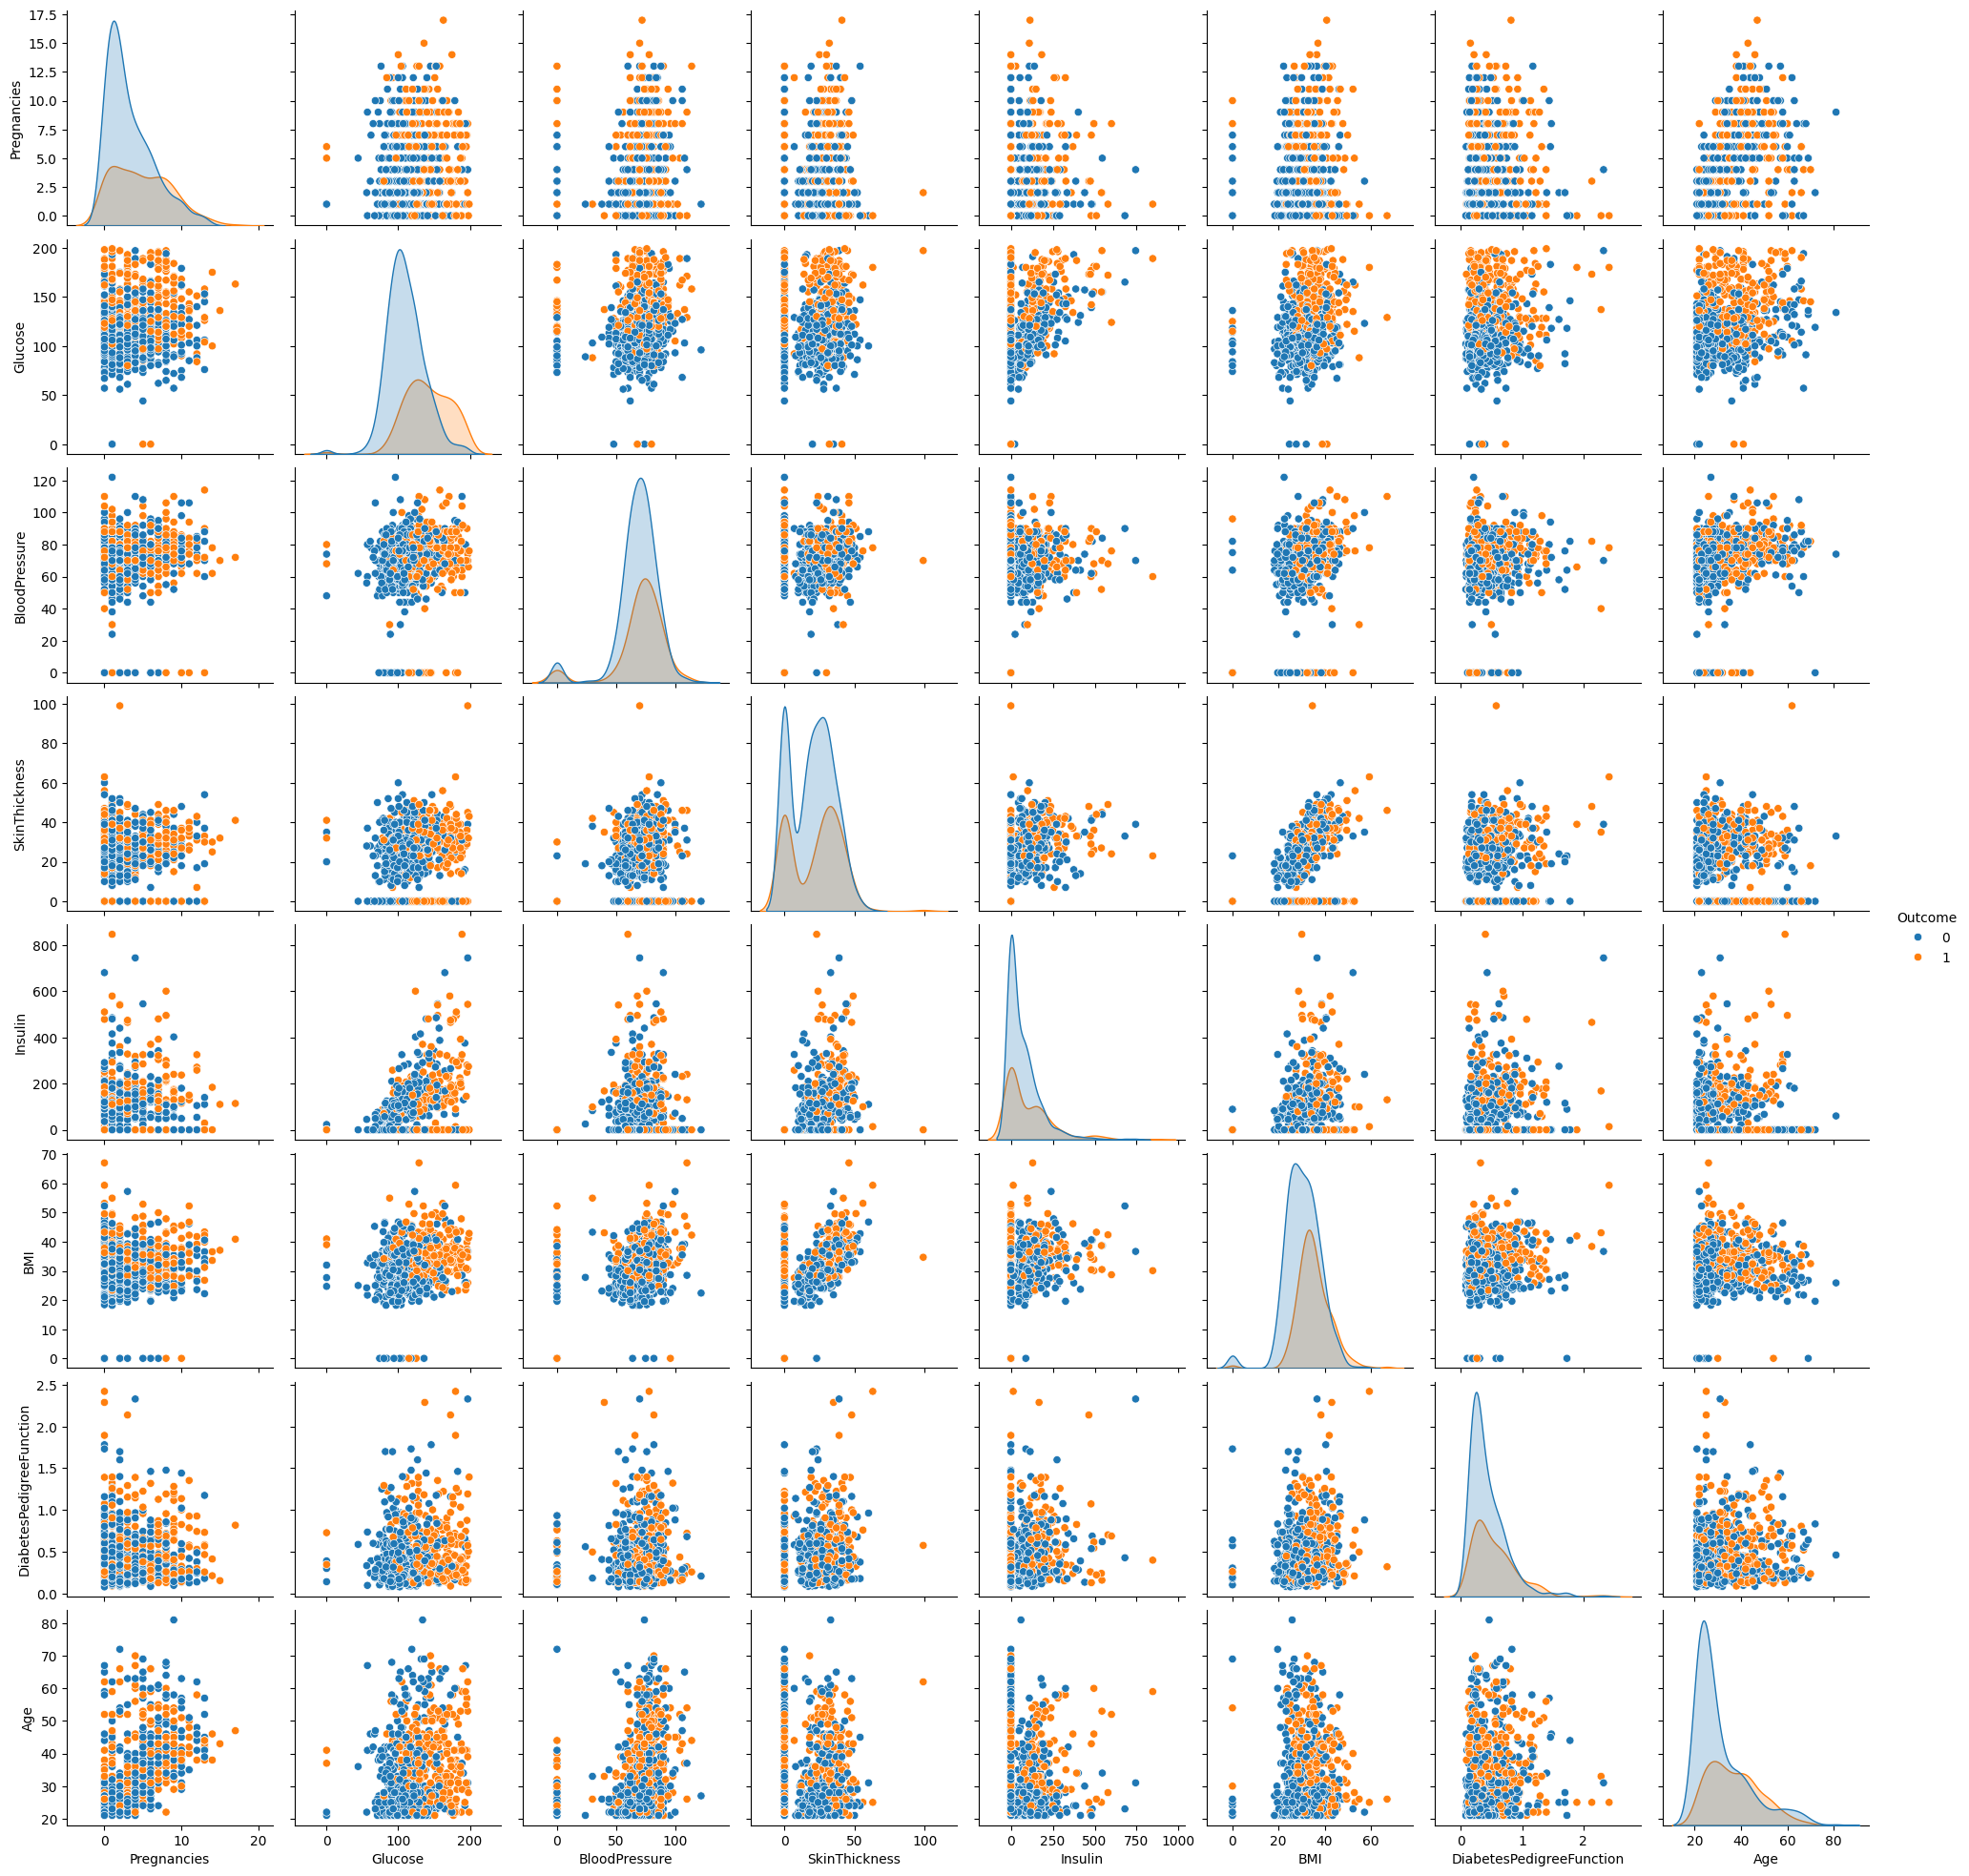

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for all features
df.hist(figsize=(12, 10))
plt.show()

# Plot a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Pairplot to visualize relationships between features
sns.pairplot(df, hue="Outcome", diag_kind="kde")
plt.show()

Summary Statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000

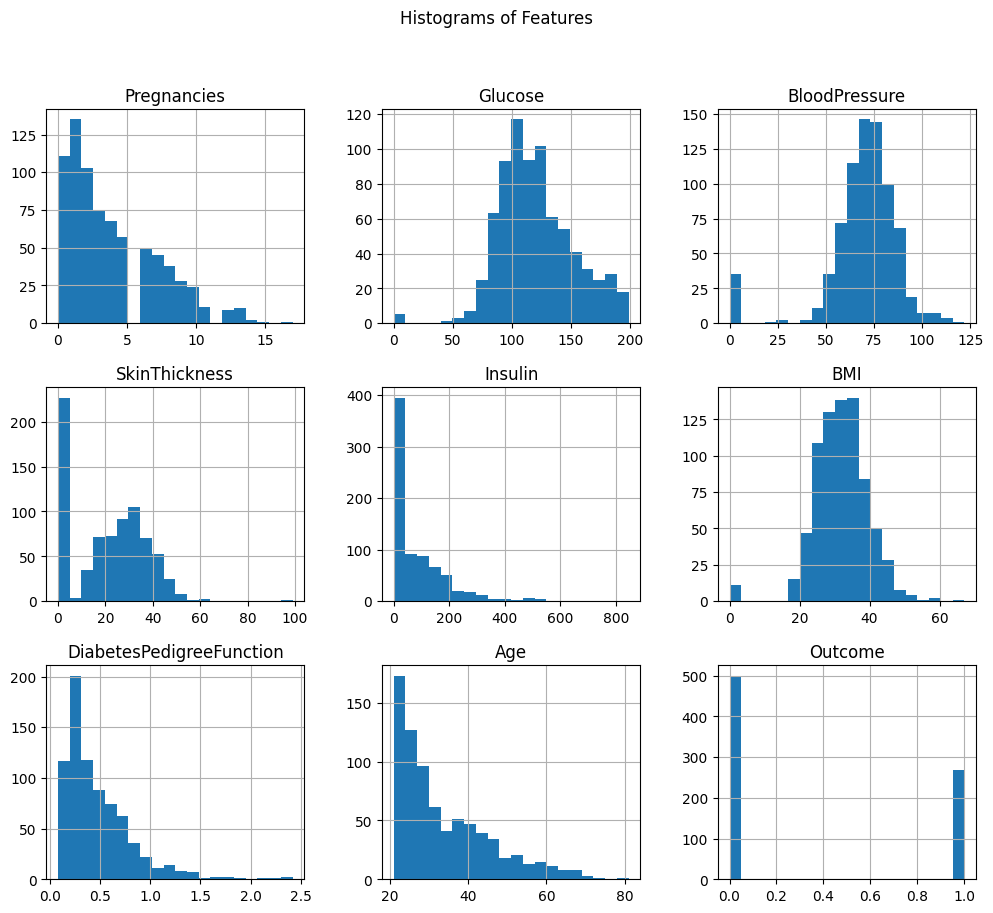

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
df = pd.read_csv(url, names=column_names)

# Display summary statistics
print("Summary Statistics:\n", df.describe())

# Plot histograms for all features
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms of Features")
plt.show()

Missing Values (Zeros):
 Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


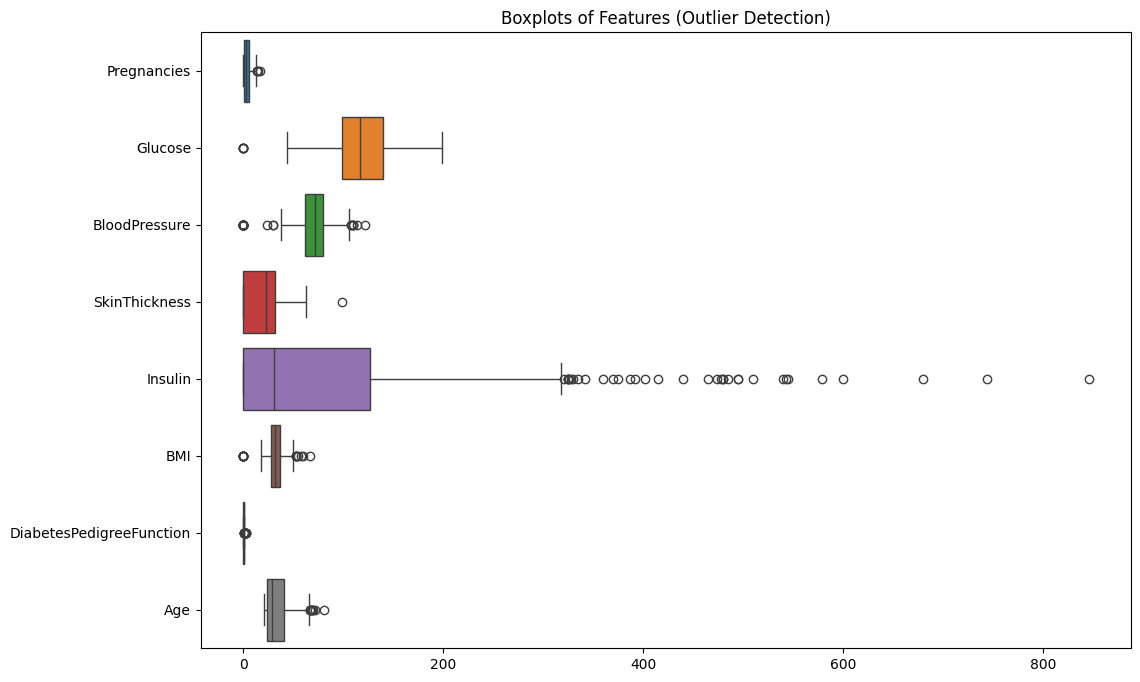

In [7]:
# Check for missing values (zeros in certain columns)
print("Missing Values (Zeros):\n", (df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] == 0).sum())

# Check for outliers using boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.drop(columns=["Outcome"]), orient="h")
plt.title("Boxplots of Features (Outlier Detection)")
plt.show()


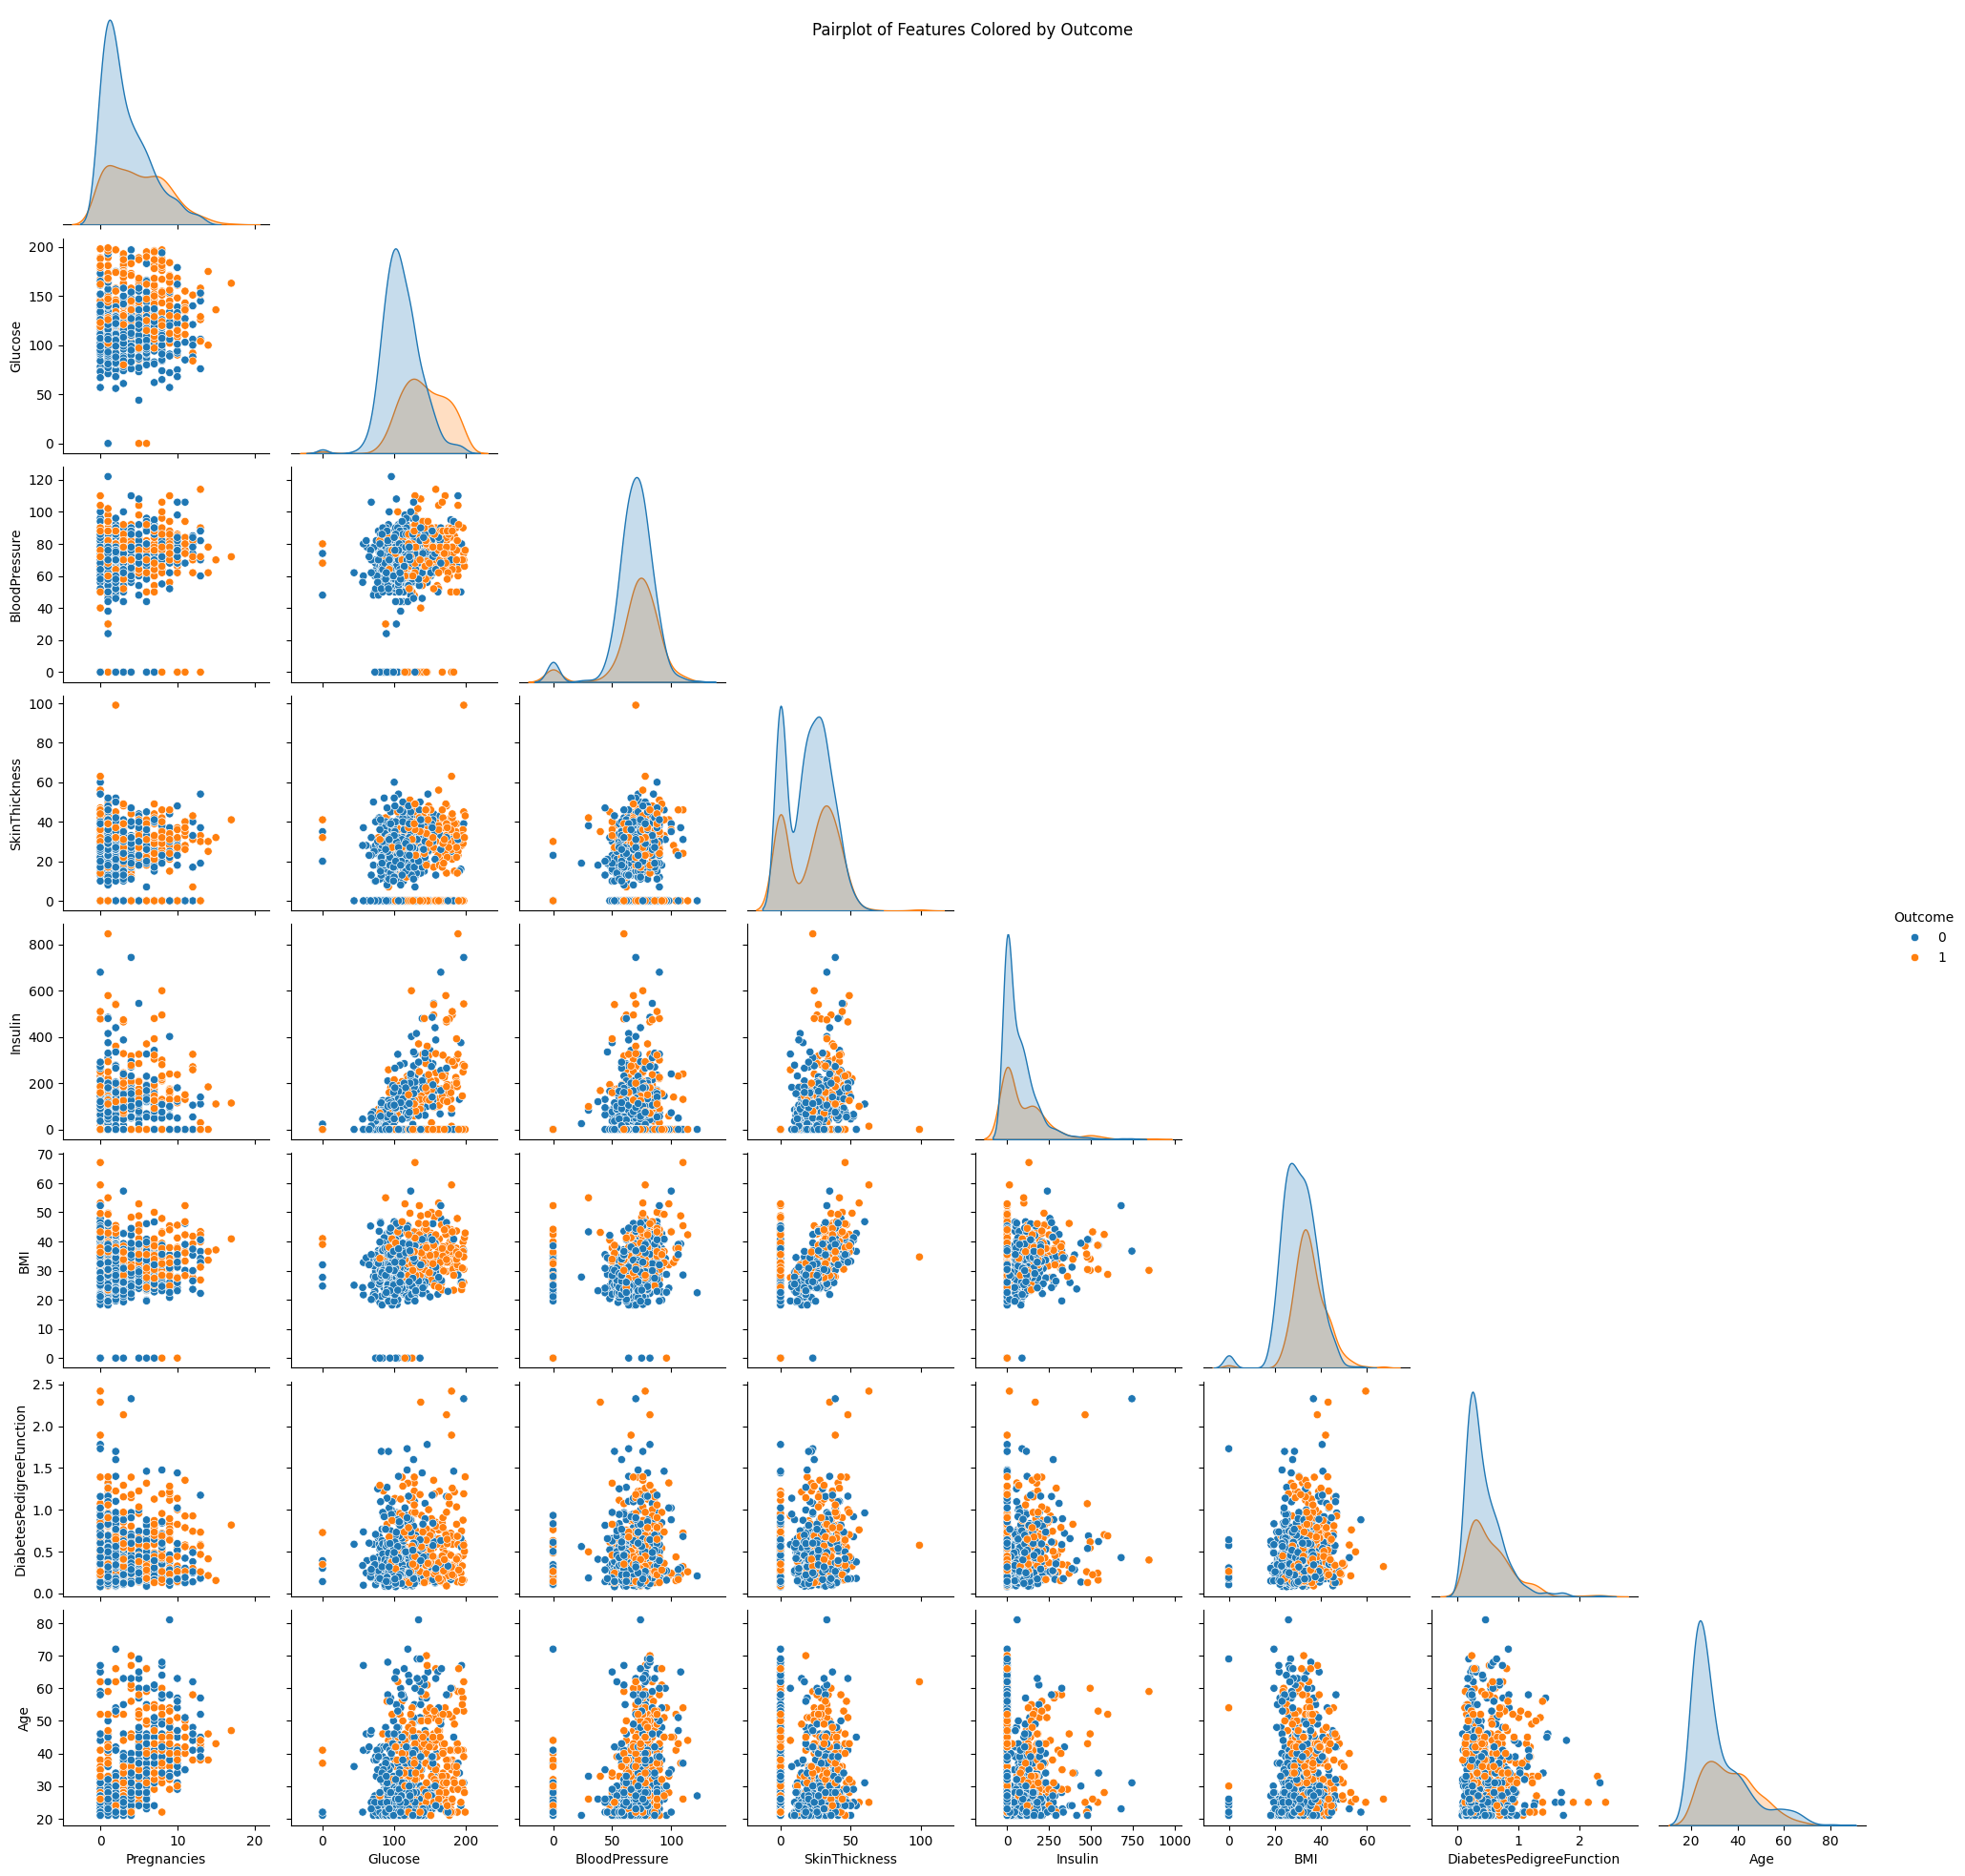

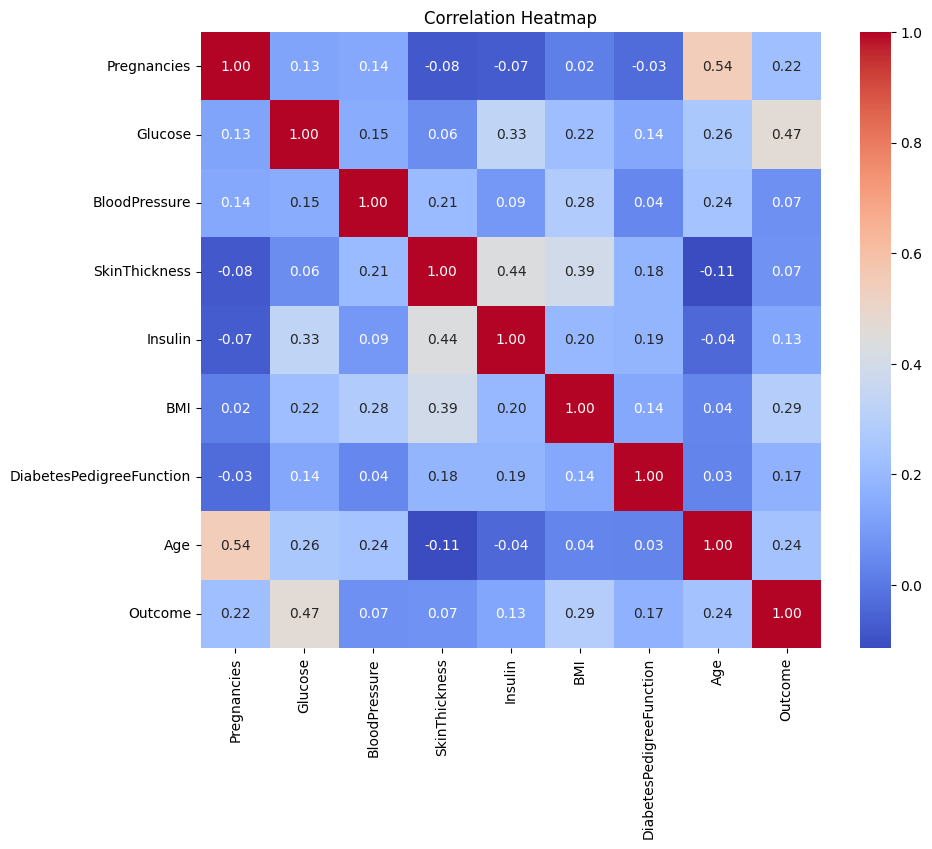

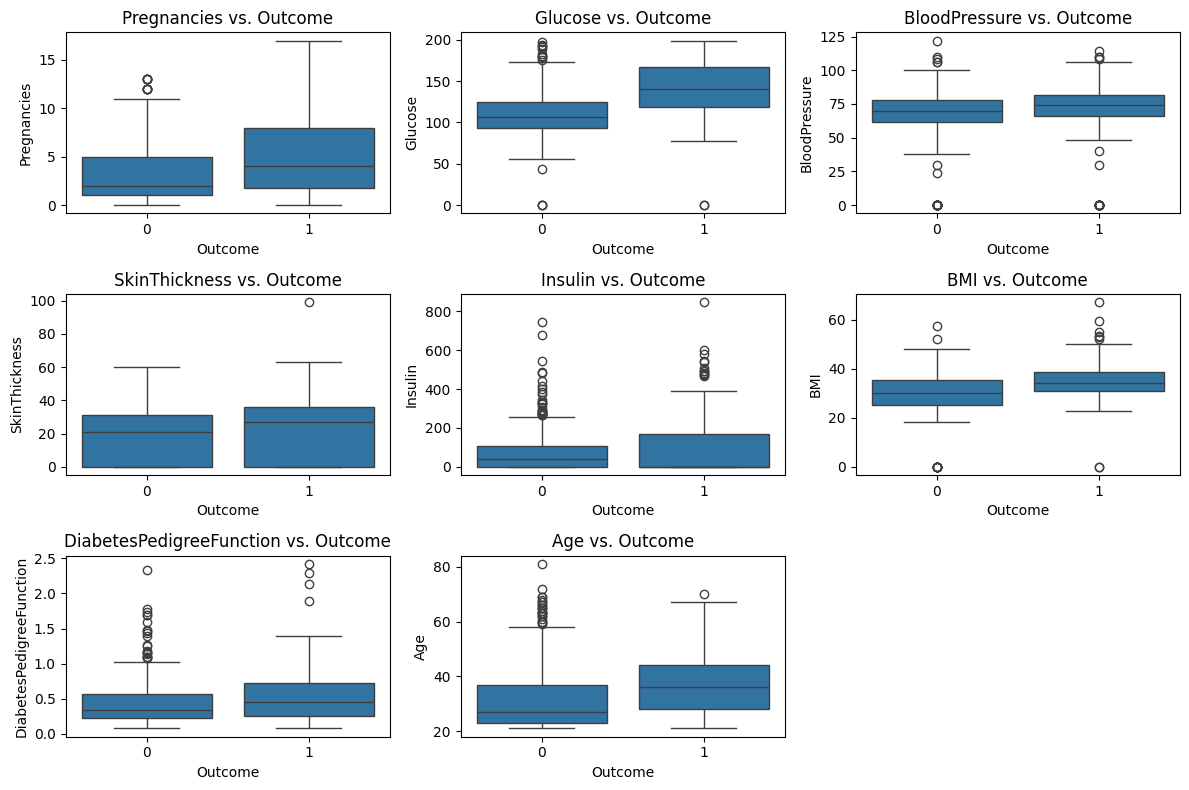

In [8]:
# Pairplot to visualize relationships between features and the target variable
sns.pairplot(df, hue="Outcome", diag_kind="kde", corner=True)
plt.suptitle("Pairplot of Features Colored by Outcome")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Boxplots of features vs. outcome
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x="Outcome", y=col, data=df)
    plt.title(f"{col} vs. Outcome")
plt.tight_layout()
plt.show()


In [9]:
# Replace zeros with NaN
import numpy as np
df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.nan)

# Fill NaN values with the median
df.fillna(df.median(), inplace=True)

# Verify no missing values remain
print("Missing values after imputation:\n", df.isnull().sum())

Missing values after imputation:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


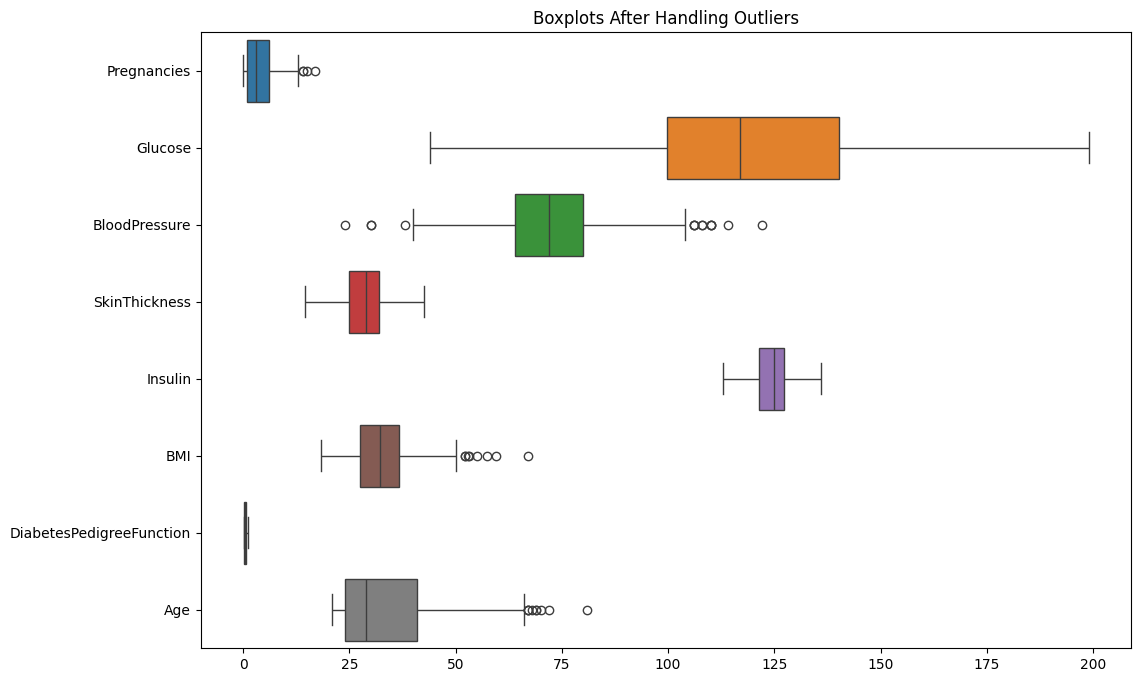

In [10]:
# Function to clip outliers
def clip_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column.clip(lower_bound, upper_bound)

# Apply to columns with outliers
df["Insulin"] = clip_outliers(df["Insulin"])
df["SkinThickness"] = clip_outliers(df["SkinThickness"])
df["DiabetesPedigreeFunction"] = clip_outliers(df["DiabetesPedigreeFunction"])

# Verify outliers are handled
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.drop(columns=["Outcome"]), orient="h")
plt.title("Boxplots After Handling Outliers")
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for readability
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first 5 rows of scaled data
print("Scaled Features:\n", X_scaled.head())

Scaled Features:
    Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.866045      -0.031990       0.824667  0.039062  0.166619   
1    -0.844885 -1.205066      -0.528319       0.017945  0.039062 -0.852200   
2     1.233880  2.016662      -0.693761       0.017945  0.039062 -1.332500   
3    -0.844885 -1.073567      -0.528319      -0.788777 -1.494110 -0.633881   
4    -1.141852  0.504422      -2.679076       0.824667  1.414175  1.549303   

   DiabetesPedigreeFunction       Age  
0                  0.588927  1.425995  
1                 -0.378101 -0.190672  
2                  0.746595 -0.105584  
3                 -1.022787 -1.041549  
4                  2.596563 -0.020496  


In [12]:
# Create Age Groups
bins = [20, 30, 40, 50, 60, 100]
labels = ["20-30", "30-40", "40-50", "50-60", "60+"]
X_scaled["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels)

# Create BMI Categories
bmi_bins = [0, 18.5, 25, 30, 100]
bmi_labels = ["Underweight", "Normal", "Overweight", "Obese"]
X_scaled["BMICategory"] = pd.cut(df["BMI"], bins=bmi_bins, labels=bmi_labels)

# One-hot encode categorical features
X_scaled = pd.get_dummies(X_scaled, columns=["AgeGroup", "BMICategory"], drop_first=True)

# Display the first 5 rows of the final preprocessed data
print("Final Preprocessed Data:\n", X_scaled.head())

Final Preprocessed Data:
    Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.866045      -0.031990       0.824667  0.039062  0.166619   
1    -0.844885 -1.205066      -0.528319       0.017945  0.039062 -0.852200   
2     1.233880  2.016662      -0.693761       0.017945  0.039062 -1.332500   
3    -0.844885 -1.073567      -0.528319      -0.788777 -1.494110 -0.633881   
4    -1.141852  0.504422      -2.679076       0.824667  1.414175  1.549303   

   DiabetesPedigreeFunction       Age  AgeGroup_30-40  AgeGroup_40-50  \
0                  0.588927  1.425995           False            True   
1                 -0.378101 -0.190672            True           False   
2                  0.746595 -0.105584            True           False   
3                 -1.022787 -1.041549           False           False   
4                  2.596563 -0.020496            True           False   

   AgeGroup_50-60  AgeGroup_60+  BMICategory_Normal  BMICategory_O

In [13]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the splits
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (614, 15)
Testing set shape: (154, 15)


In [16]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [17]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Train the model with the best parameters
best_rf_model = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.7719978675196588


Accuracy: 0.7597402597402597
Precision: 0.6808510638297872
Recall: 0.5925925925925926
F1-Score: 0.6336633663366337
ROC-AUC Score: 0.7212962962962962


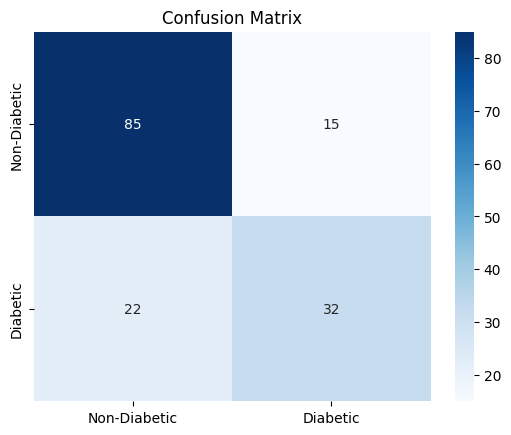

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Diabetic", "Diabetic"], yticklabels=["Non-Diabetic", "Diabetic"])
plt.title("Confusion Matrix")
plt.show()

In [20]:
# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)
y_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC-AUC Score:", roc_auc)

Accuracy: 0.7597402597402597
Precision: 0.6808510638297872
Recall: 0.5925925925925926
F1-Score: 0.6336633663366337
ROC-AUC Score: 0.8211111111111111


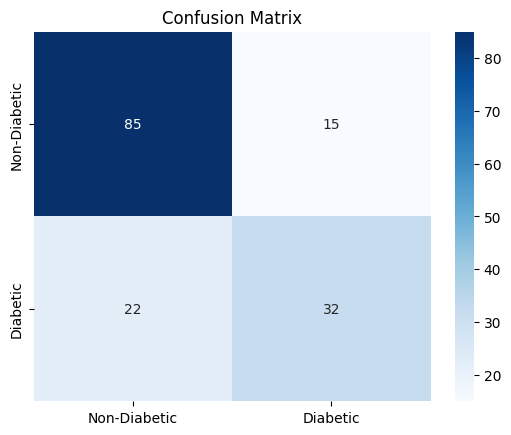

In [22]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Diabetic", "Diabetic"], yticklabels=["Non-Diabetic", "Diabetic"])
plt.title("Confusion Matrix")
plt.show()

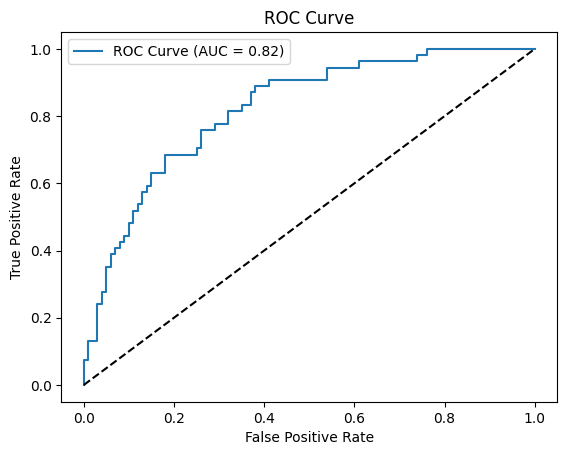

In [23]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

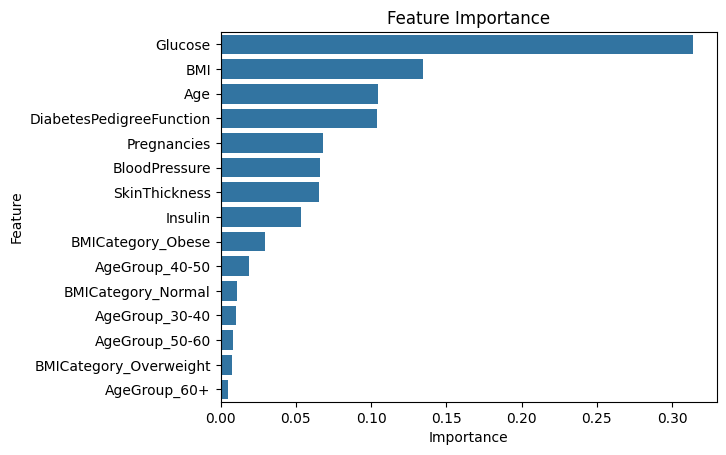

In [24]:
# Feature Importance
feature_importance = best_rf_model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance}).sort_values(by="Importance", ascending=False)

# Plot feature importance
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance")
plt.show()